# House Sales

## Intro
In this notebook, we'll gradually go through the steps of an actual data science project, beginning to end. Each asynchronous block, I'll post new pointers/things to try with a broad goal. Using the power of python and the glory of googling, your task is to try to take steps toward that goal. The following asynchronous block I'll post "solutions" for the previous block's tasks. Note that because this process is actually messy in practice, my solutions should not be considered *the* right answer but merely something like *one possible right-ish answer*. Once I've posted the solutions you're welcome to incorporate my ideas into your notebook to whatever degree you'd like.

## Dataset
Go to myViewpoint and under donwloads you should see HouseSalesLabData. Download the file (`housesalesprediction.zip`). When you unzip the file, you'll get a file called `kc_house_data.csv`. Put this file in the data sub-folder of your repo.

## Data exploration and data wrangling
The first steps in a data science project are often just to get a rough sense of what's going on with the data. This process is called data exploration. You want to know things like how many features, how many datapoints, what column is the label, what is the distribution of the label, what is the distribution of each feature, etc.

The next steps in a data science project is often data wrangling. Maybe some columns are dumb. Maybe there are outliers. Maybe we need to preprocess.

Both of these tasks are best done in python using a library called pandas. Combine the ideas from the tutorial [here](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/) with this dataset in the cells below. Note that you should skip the steps about installing pandas.



# Loading the data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# First look at data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

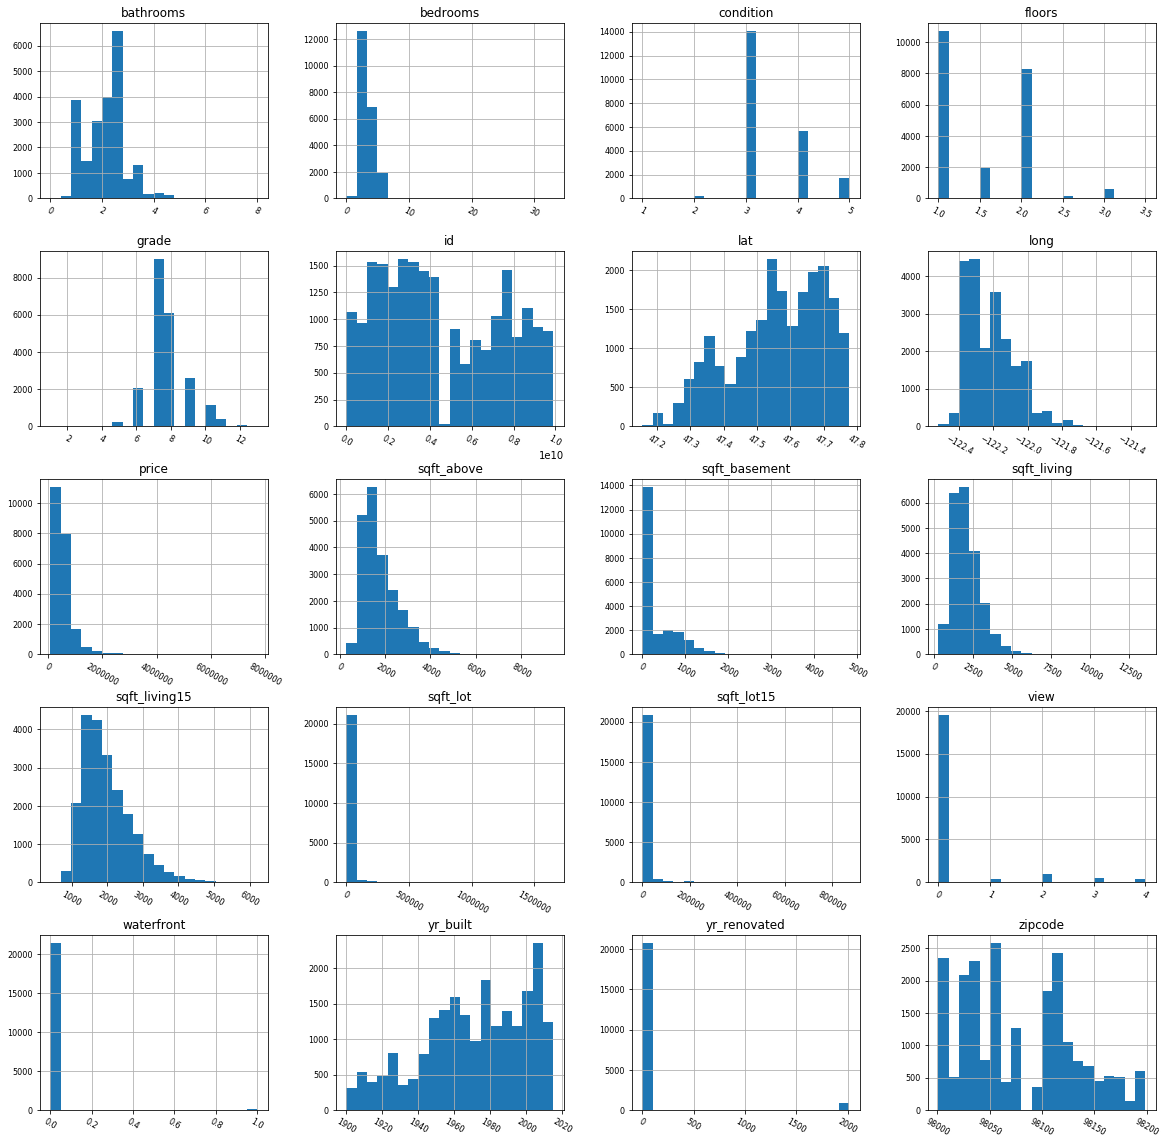

In [5]:
h = df.hist(bins=20,figsize=(20,20),xlabelsize='8',ylabelsize='8',xrot=-30)

## First look at the data explained:
In the above histograms we see that most things don't look too problematic. Several columns, such as sqft_lot and sqft_lot15, seem somewhat right-skewed (they have a long right tail, lots and lots of lowish values with a small amount of houses having substantially smaller values). For now, I'm not too disturbed by this, but we might remember it and play around with it later. 

In fact, price has this same property. That's also interesting to think about at some point. For now, not much we need to do, though.

Around this time is also when I start trying to make sense of what each column might mean. Under truly realistic conditions you'd hopefully have access to some way of getting this info, but under the circumstances your best bet is just to ask Mr. Donoghue. To save you some trouble, I'll include a description I was able to dig up here:

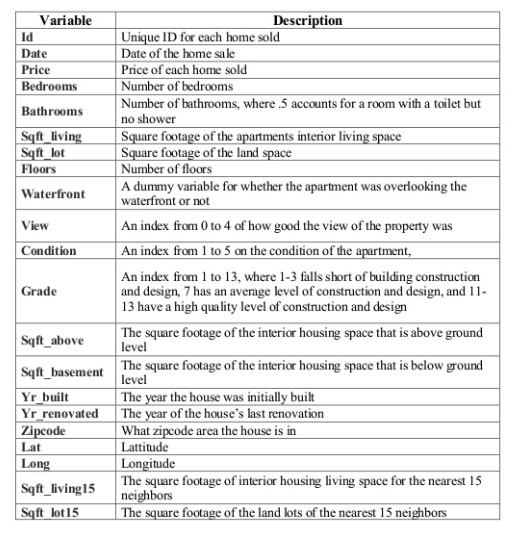

Now it's worth thinking about whether some features should be included at all in our model. Below I'll end up dropping features I thought seemed more trouble than they were worth. See if you can figure out why I dropped each feature.

# Splitting our dataset
Strictly speaking, one could probably argue that I really should have split the dataset even before the previous step. Certainly we should split very early in the process, but  looking at the raw distributions of each feature and of the label isn't particularly dangerous. What decisions could I realistically be making here that would be cheating? Not very much. However, for the next section, I could reasonably be accused of cheating if I didn't split first. Think about why this is.



## Price vs. feature
Another useful early step is to try to establish some intuition about the correlation of each feature with the label. You might have some intuition from domain expertise, but we can also develop the intuition by making scatter plots, or by computing a correlation coefficient. I'll take the plotting approach below.

In [6]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, random_state=42)



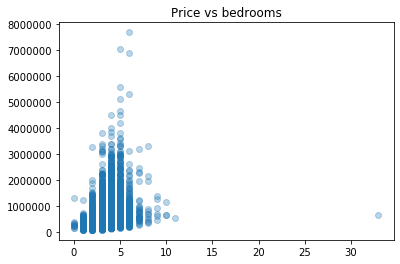

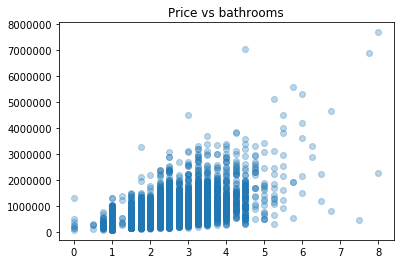

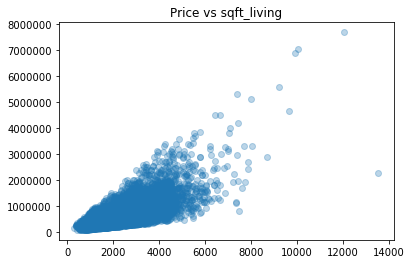

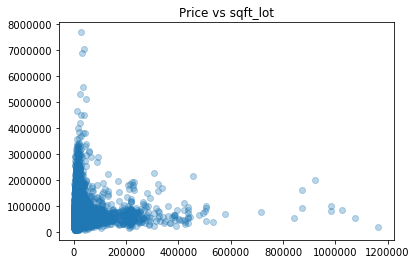

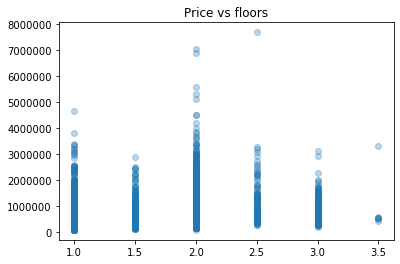

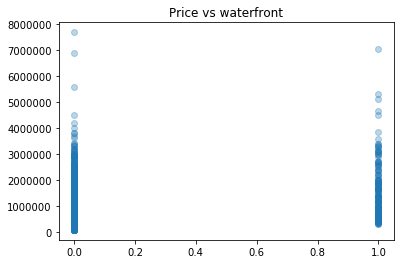

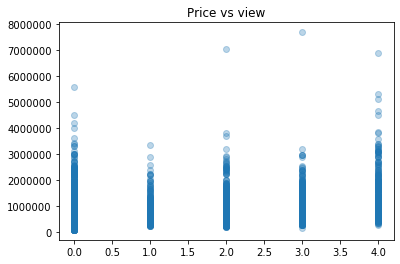

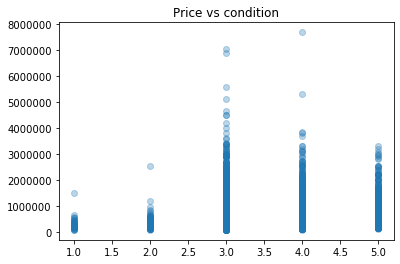

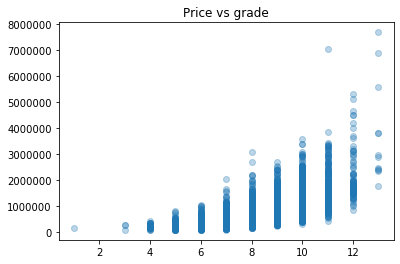

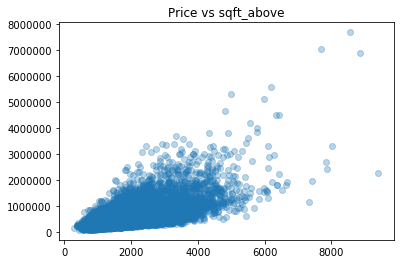

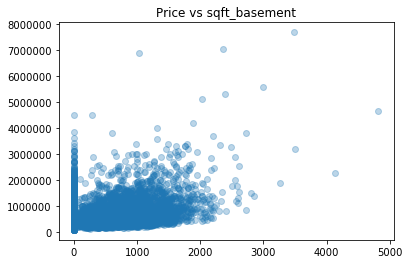

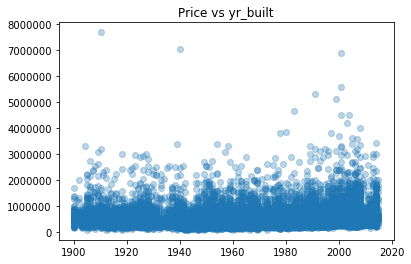

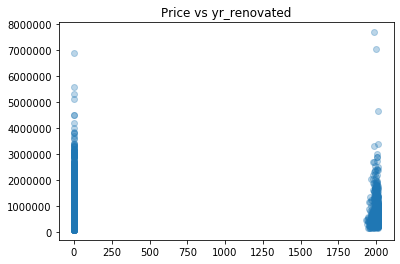

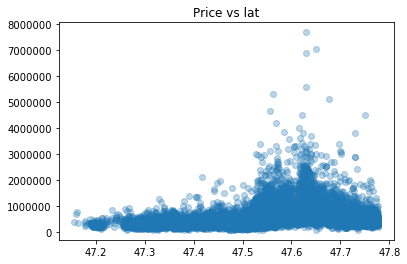

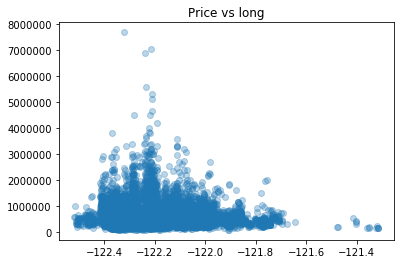

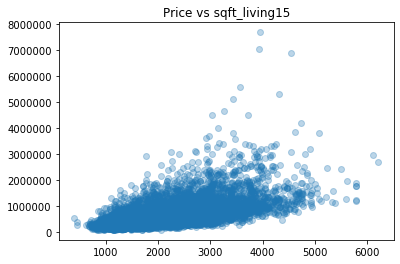

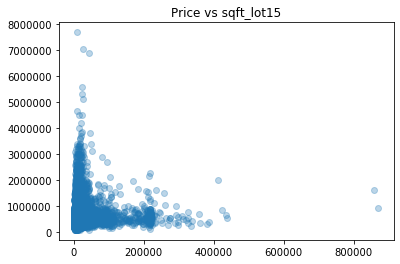

In [8]:
for col in X_train.columns:
    plt.plot(X_train[col], y_train, "o", alpha = 0.3)
    plt.title("Price vs " + col)
    plt.show()


## Price vs. feature explained

Looking closer, we see that some features do seem to be fairly correlated with price, but for some whatever association is there seems quite complicated (e.g., sqft_lot).

I'm also noticing some outliers like a house that allegedly has 33 bedrooms. For this, I have two main choices: throw it out or keep it. I'm inclined to throw it out and hope that I have no similar cases in my testing data. Even if a similar thing shows up in test, I'm not sure it's worth the possible damage it would do to all our other predictions.

Another interesting thing to note is that some features like bedrooms, floors, etc. are not continuous. In fact these features are ordinal. It's often helpful to look at correlation of a continuous feature vs an ordinal feature using a boxplot instead of a simple scatterplot like we did above. Below I'll do that for some of the more interesting ordinal (and binary categorical) columns. 

In [9]:
y_train = y_train[X_train['bedrooms'] < 30]
X_train = X_train[X_train['bedrooms'] < 30]

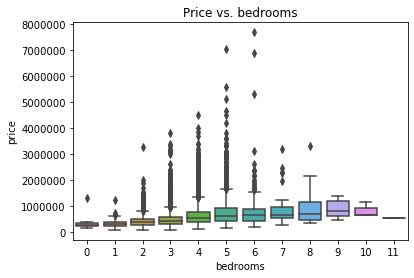

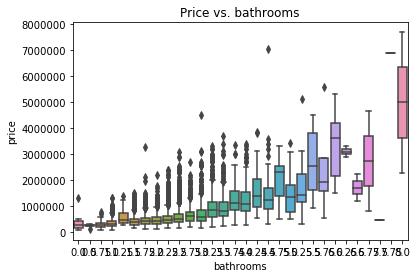

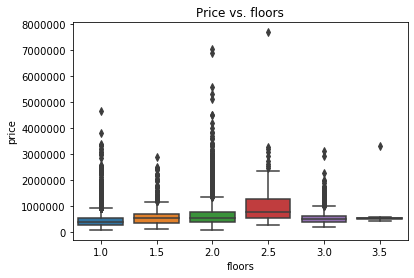

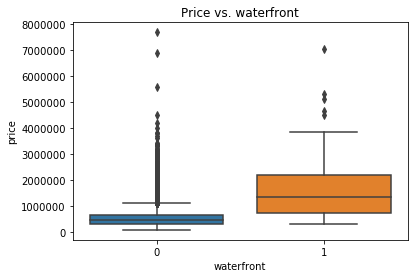

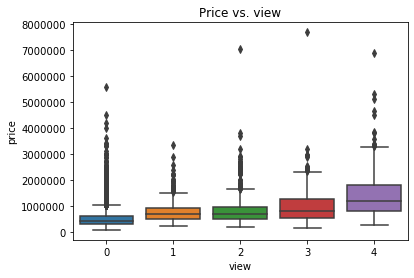

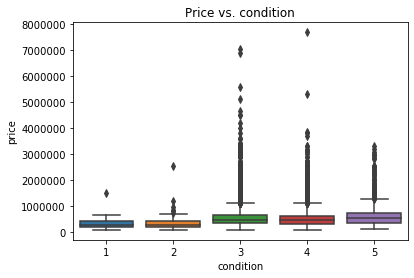

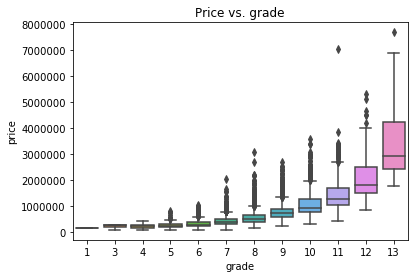

In [10]:
for col in ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade' ]:
    plt.figure()
    sns.boxplot(x=X_train[col],y=y_train)
    plt.title("Price vs. " + col)

## Price vs. feature explained (cont.)
Looking at these features using the box plot it becomes easier to see an association. Pay particular attention to the median of each bin (represented by the horizontal line inside the box). 

Between this set of plots and the previous, we can now feel somewhat hopeful that whatever models we build will be able to make some reasonable predictions.